In [16]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [18]:
list_of_markets=['C','JM','I','M','BB','J','CS','PP','L','V','JD','P','A','Y']
df=pd.DataFrame()
for m in list_of_markets:
    try:
        df[m]=get_timeseries(m)
    except:
        break

# Getting covariance matrix
12 month momentum per market returns

In [19]:
pos=tsmom_daily(df,250)
pnl=calc_pnl(pos,df)
sr=calc_Sharpe(pnl)

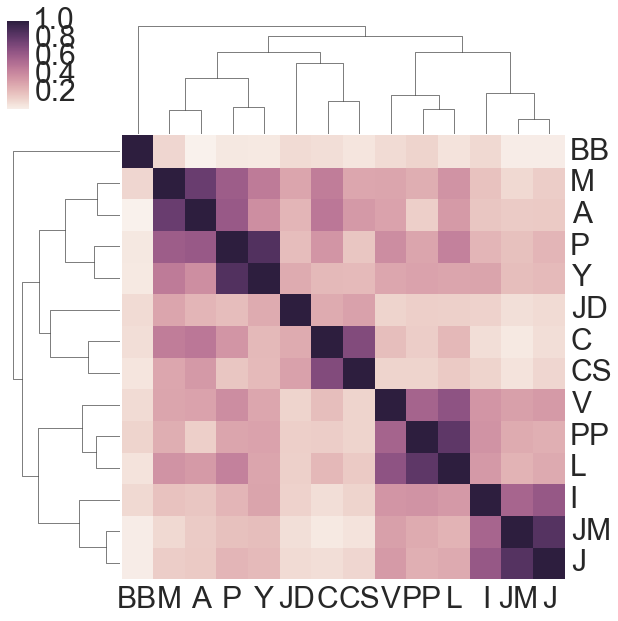

In [22]:
sns.clustermap(df[list_of_markets].corr())

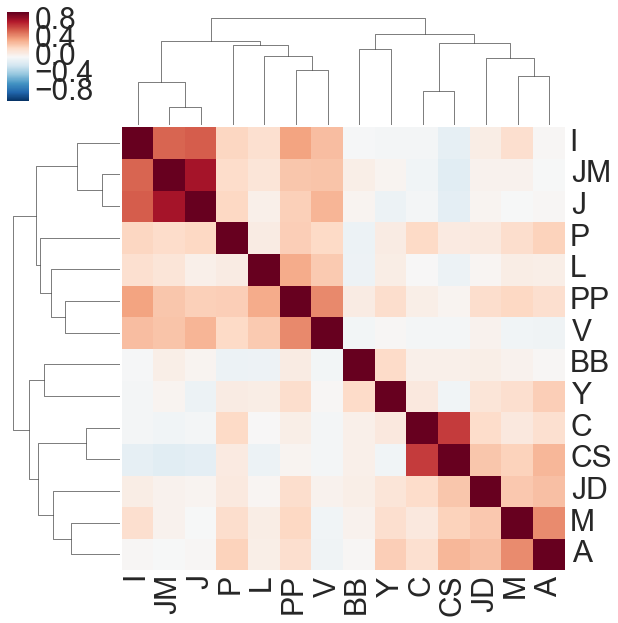

In [23]:
sns.clustermap(pnl[list_of_markets].corr())

# Portfolio construction techniques

* I think 1/N is a great approach.  Robust and robust throughout time as well.  
* The key question remains to build a capital function that scales the portfolio appropriatly.
* Ideally, I want to give it volatility target with a given strategy

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm

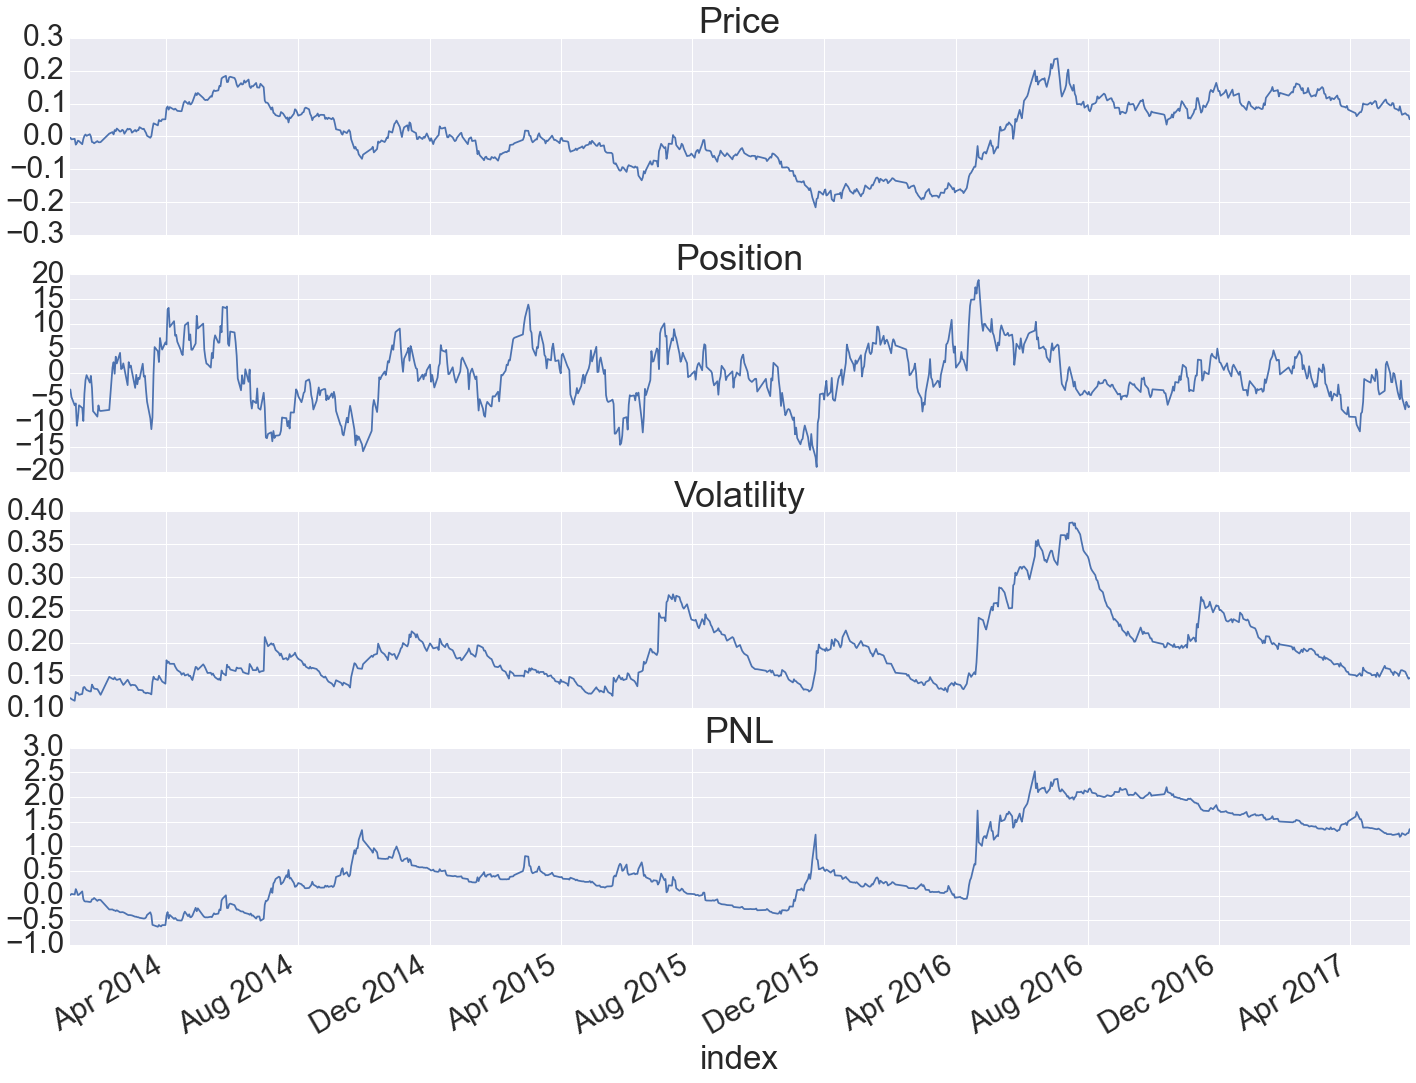

In [277]:
pos=tsmom_daily(df,20)
pos=ewma_mom_daily(df,20,60)
pnl=calc_pnl_wc(pos,df)
diag=pd.DataFrame()
m='M'
diag['Pos']=pos[m].dropna()
diag['Price']=df[m].dropna()
diag['PNL']=pnl[m].dropna()
diag['Vol']=pd.ewmstd(df[m],20)*16
diag=diag['2014':]
fig,axs=plt.subplots(4,1,sharex=True)
diag.Price.cumsum().plot(ax=axs[0],title='Price')
diag.Pos.plot(ax=axs[1],title='Position')
diag.PNL.cumsum().plot(ax=axs[3],title='PNL')
diag.Vol.plot(ax=axs[2],title='Volatility')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=30).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=90).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: Fut

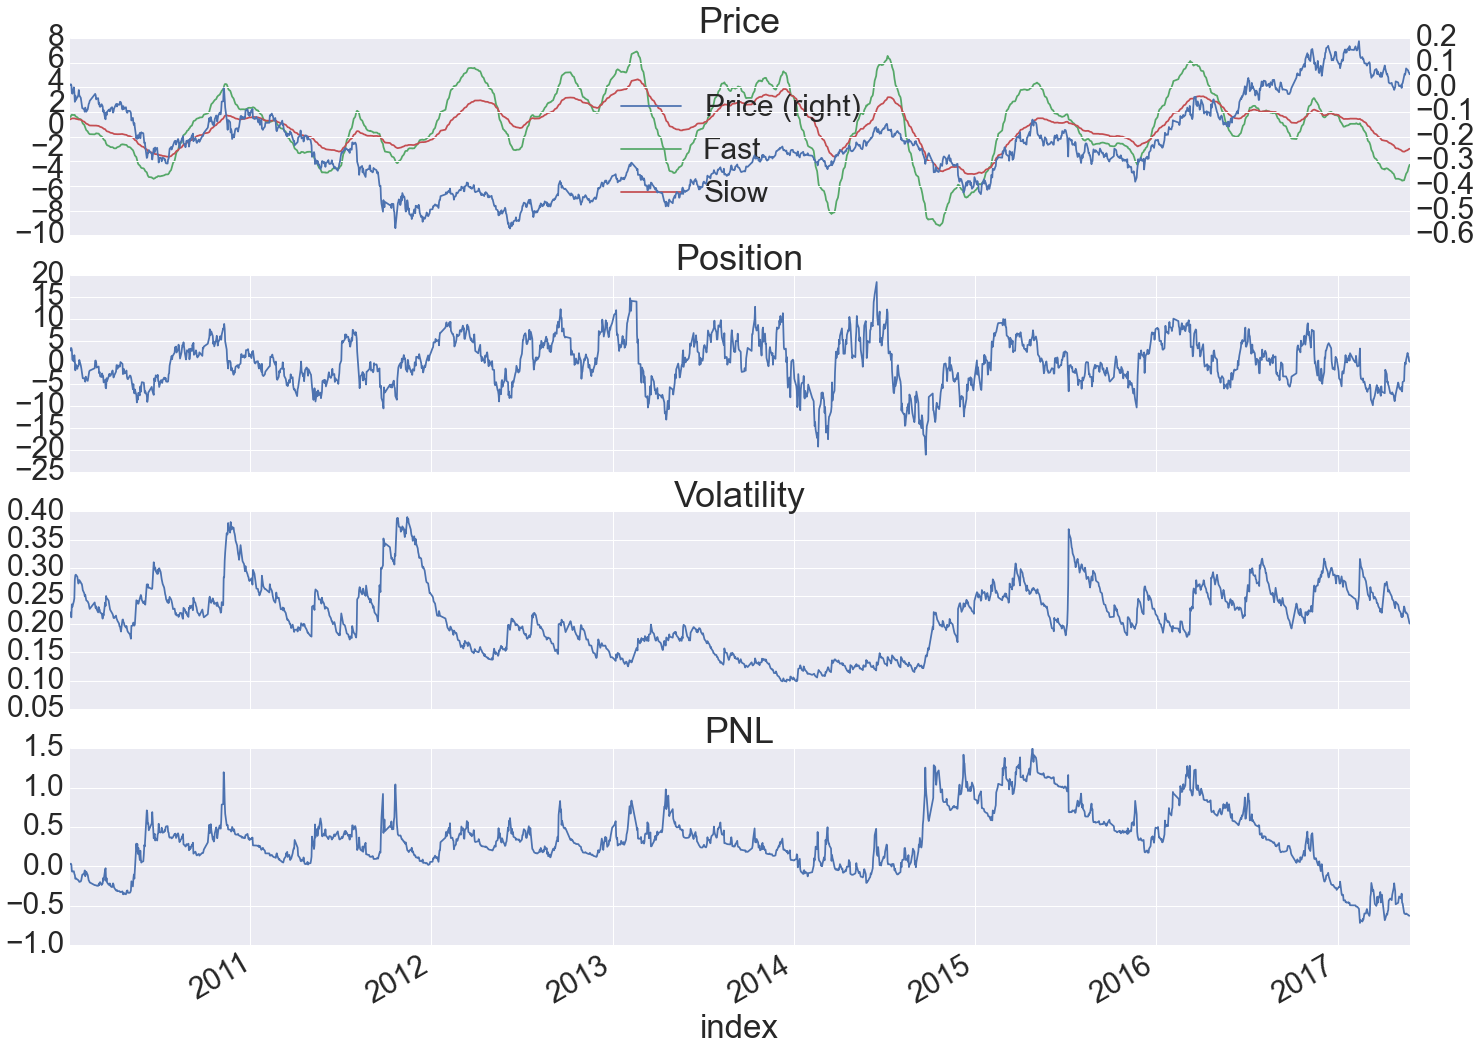

In [278]:
fast=30
slow=90
pos=ewma_mom_daily(df,fast,slow)
pnl=calc_pnl_wc(pos,df)
diag=pd.DataFrame()
m='L'
diag['Pos']=pos[m].dropna()
diag['Fast']=pd.ewma(pos[m],fast).dropna()
diag['Slow']=pd.ewma(pos[m],slow).dropna()
diag['Raw']=diag.Fast-diag.Slow
diag['Price']=df[m].dropna()
diag['PNL']=pnl[m].dropna()
diag['Vol']=pd.ewmstd(df[m],20)*16
diag=diag['2010':]
diag['Price']=diag.Price.cumsum()
fig,axs=plt.subplots(4,1,sharex=True)
diag[['Price','Fast','Slow']].plot(ax=axs[0],title='Price',secondary_y='Price')
diag.Pos.plot(ax=axs[1],title='Position')
diag.PNL.cumsum().plot(ax=axs[3],title='PNL')
diag.Vol.plot(ax=axs[2],title='Volatility')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=30).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=90).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: Fut

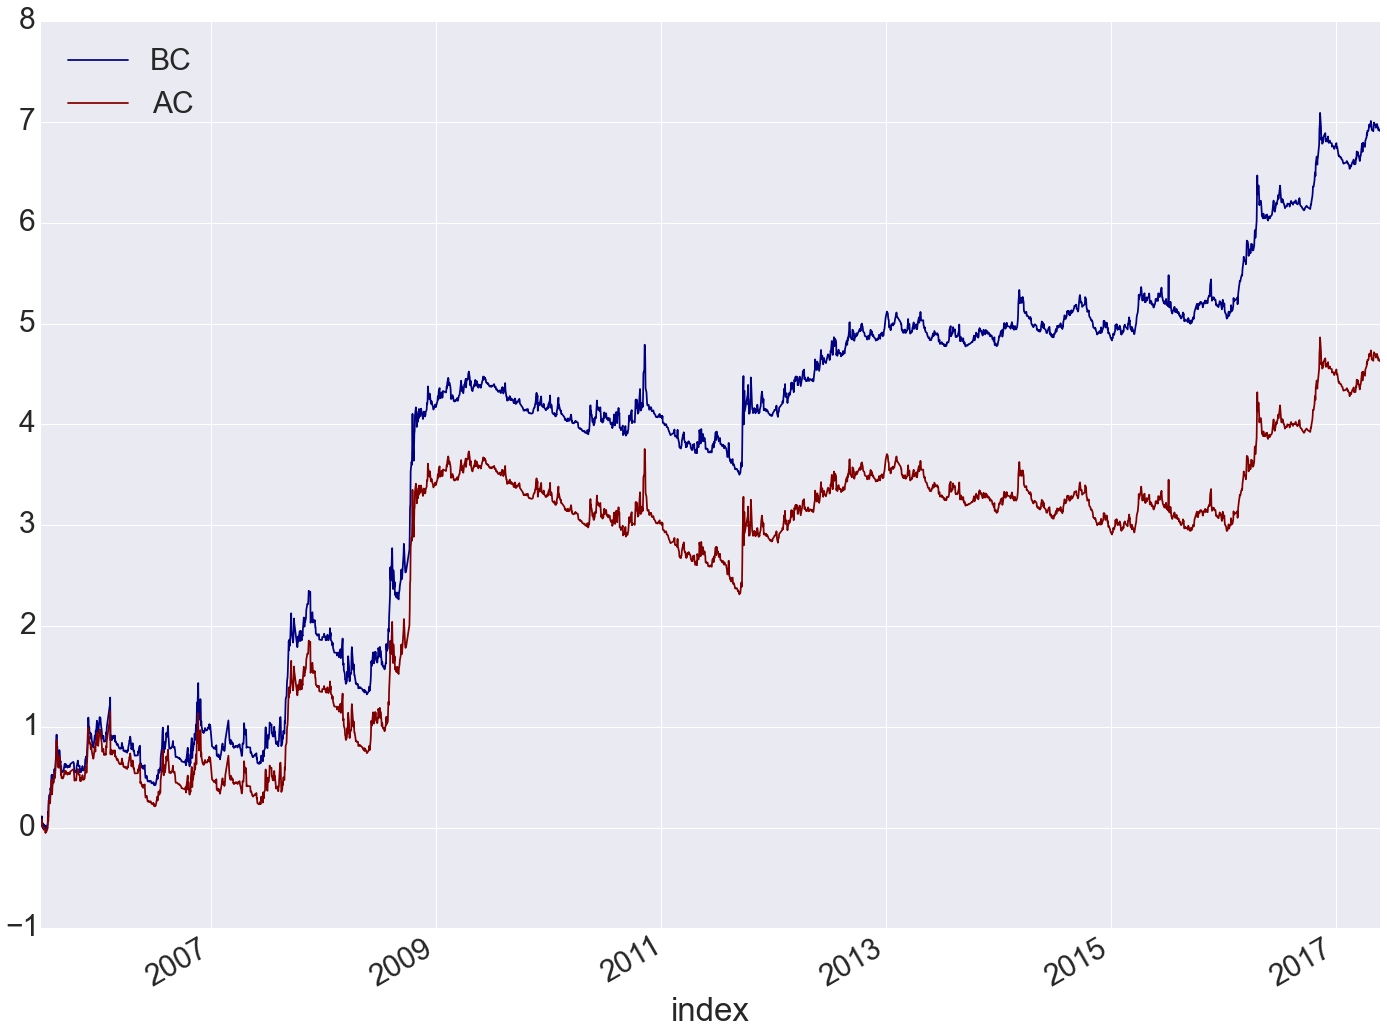

In [282]:
fast=30
slow=90
pos=ewma_mom_daily(df,fast,slow)
rtn=pd.DataFrame()
pnl_bc=calc_pnl(pos,df)
rtn['BC']=ew_portfolio_pnl(pnl_bc)
pnl_ac=calc_pnl_wc(pos,df,fee=.0005)
rtn['AC']=ew_portfolio_pnl(pnl_ac)
rtn.cumsum().plot(colormap='jet')

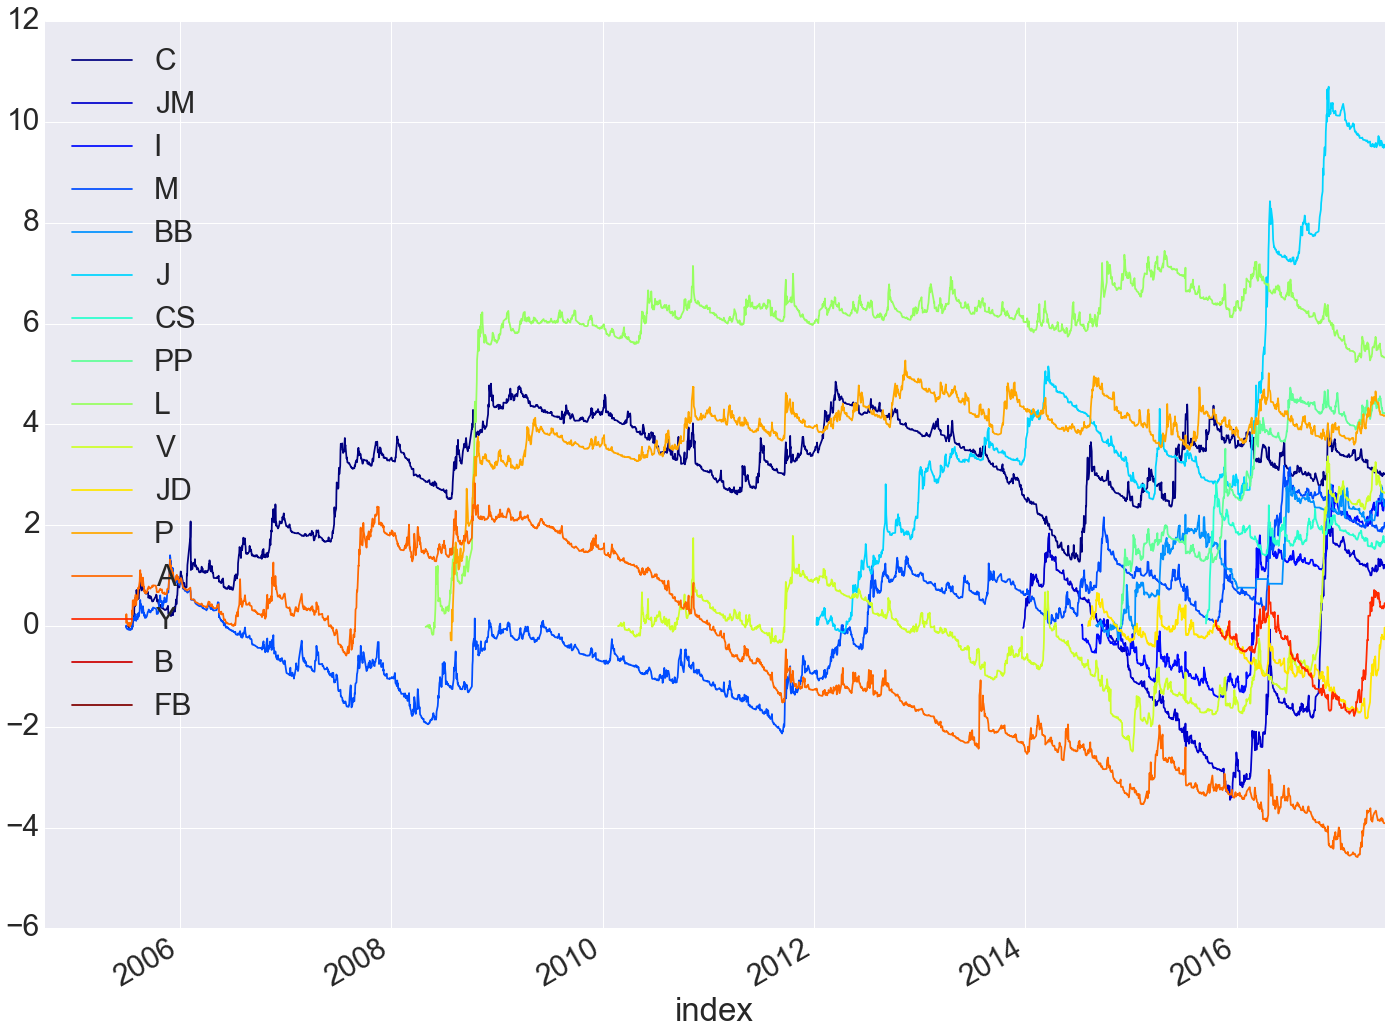

In [283]:
pnl.cumsum().plot(colormap='jet')